https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model

In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


<img src="hh.jpg" width=50%/>

<img src="hh_eq1.jpg" width=50%/>

<img src="hh_eq2.jpg" width=25%/>

In [2]:
# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

In [3]:
# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (exp(3.0 - (0.1 * Vm)) + 1.0)

In [4]:
# The Model

def dXdt(X, t):
    Vm, n, m, h = X
    
    # dVm/dt
    GK = gK * n**4 / Cm
    GNa = gNa * m**3.0 * h / Cm
    GL = gL / Cm
    
    # dVm/dt
    dV = (Id(t) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dn = alpha_n(Vm) * (1 - n) - beta_n(Vm) * n
    
    # dm/dt
    dm = alpha_m(Vm) * (1 - m) - beta_m(Vm) * m
    
    # dh/dt
    dh = alpha_h(Vm) * (1 - h) - beta_h(Vm) * h
    
    return [dV, dn, dm, dh]

In [20]:
# Input stimulus
def Id(t):
    return 50*(sin(t)>0.99)

In [23]:
# Time values
T = linspace(0, 50, 5000)
# Solve ODE system
x0=array([0.0, 0.5, 0.0, 0.3])

x = odeint(dXdt, x0, T)

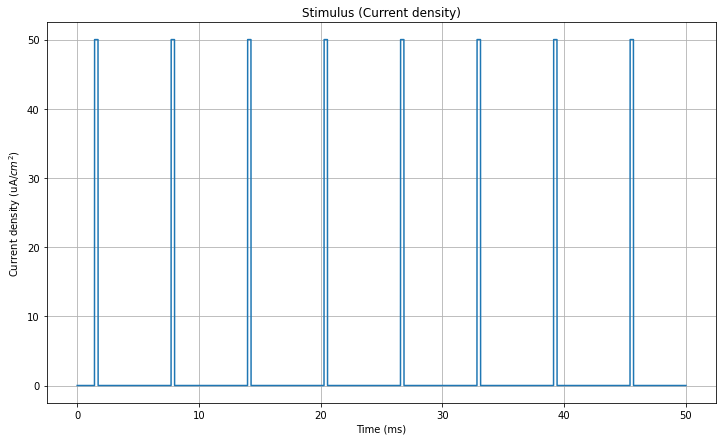

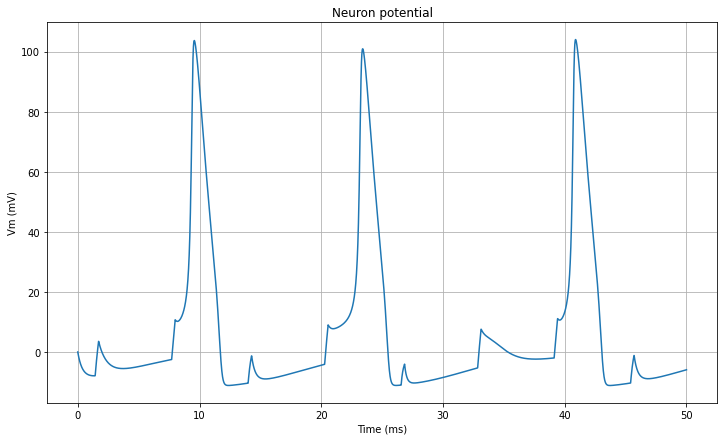

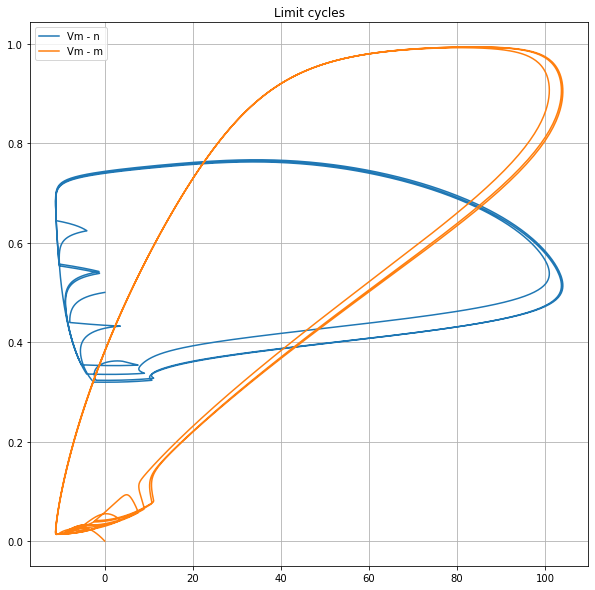

In [24]:
# Input stimulus
Idv = [Id(t) for t in T]

fig, ax = subplots(figsize=(12, 7))
ax.plot(T, Idv)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
grid()

# Neuron potential
fig, ax = subplots(figsize=(12, 7))
ax.plot(T, x[:, 0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron potential')
grid()

# Trajectories with limit cycles
fig, ax = subplots(figsize=(10, 10))
ax.plot(x[:, 0], x[:, 1], label='Vm - n')
ax.plot(x[:, 0], x[:, 2], label='Vm - m')
ax.set_title('Limit cycles')
ax.legend()
grid()